<a href="https://colab.research.google.com/github/xyt556/Data/blob/main/03_spatial_reference_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 空间参考系统

### 简要介绍

空间参考系统（SRS）或坐标参考系统（CRS）是一个数学构造，对地理学领域至关重要。它有两个重要的作用：
1. 确切而精确地识别空间对象的位置；
2. 在地图上准确地描绘空间对象。

在其最基本的形式中，空间参考系统（SRS）由两个元素组成：
1. *基准面（Datum）* - 一个近似地球形状的球体或椭球体，相对于地球进行定位。
2. *制图投影（Cartographic Projection）* - 一组数学函数，用于将基准面上的位置转换到笛卡尔平面。

世界大地基准系统（WGS 84）是由美国国家地理空间情报局（NGA）维护的一组基准面，旨在近似地球的整体表面。如今大多数 GPS 或 GNSS 接收器报告的地理坐标（纬度和经度）都是参考其中一个 WGS 84 基准面。对于全球制图而言，WGS 84 是一个方便的选择，但在大多数情况下，对于地方性制图来说，定制的基准面更加合适。各国的国家测量定义了适合其国家或地区的特定基准面。

![Geodesic Datum](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Gloabl_and_Regional_Ellipsoids.svg/640px-Gloabl_and_Regional_Ellipsoids.svg.png)
*Sketch of geodesic datums positioned relative to the Earth's surface. Source: [Wikipaedia](https://en.wikipedia.org/wiki/Geodetic_datum).*

等距矩形投影和墨卡托投影是目前最受欢迎的投影方式，但它们都不适合用于地方性或全球制图。因此，花时间确定最合适的投影方式始终是有益的。制图投影在将地球的曲面平展到平面时会引入误差。必须在区域、形状和角度的准确性之间找到平衡。对于全球制图，像[莫尔韦德同形投影](https://en.wikipedia.org/wiki/Mollweide_projection)、[艾克特 IV 投影](https://en.wikipedia.org/wiki/Eckert_IV_projection) 或 [古德同洛西投影](https://en.wikipedia.org/wiki/Goode_homolosine_projection)等投影提供了有趣的折中方案。对于地方性制图，[立体投影](https://en.wikipedia.org/wiki/Stereographic_projection#Applications_to_other_disciplines)、[兰伯特等面积方位投影](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) 和 [高斯-克吕格投影](https://en.wikipedia.org/wiki/Transverse_Mercator_projection#Ellipsoidal_transverse_Mercator)（也称为“横轴墨卡托”）是流行的选择，但还有许多其他选择。

![Map Projections](https://upload.wikimedia.org/wikipedia/commons/0/02/Kaardiprojektsiooni_klassid.gif)
*Visual examples of the transformations applied to the *datum* by simple map projections. Source: [Wikipaedia](https://en.wikipedia.org/wiki/Map_projection).*

始终记住一件事：没有任何制图投影能够完全正确地保持距离。因此，**避免在笛卡尔平面上计算距离**，因为这些计算结果会是错误的。在小的研究区域内，误差可能微不足道，但在全球或大陆范围内，即使对于像俄罗斯这样的大国，在笛卡尔平面上计算的距离也会有显著的偏差。

### Python库

[PROJ](https://proj.org)库是FOSS4G的基石，实施了大量的制图投影和大多数大地基准。可以参考[PROJ实现的制图投影列表](https://proj.org/operations/projections/index.html)，这是探索每种投影不同特征的好地方。[pyproj](https://pyproj4.github.io/pyproj/stable/)是PROJ的原生Python接口。

另外，GDAL/OGR Python API库包含一个专门处理空间参考系统（SRS）的模块：[osgeo.osr](https://gdal.org/python/osgeo.osr-pysrc.html)。在某些情况下，它可能很方便。

### 创建一个新的坐标参考系统对象

在`pyproj`中，CRS的概念被封装在一个同名的类`CRS`中。该类的对象可以通过不同的方式进行参数化。最简单的方法可能是使用[PROJ4字符串](https://proj.org/usage/quickstart.html)，这是一种合成且富有表现力的字符串，包含一组参数。这可以通过静态方法`from_proj4`来实现：

In [1]:
from pyproj import CRS  # 导入 pyproj 库中的 CRS 类

# 使用 from_proj4 方法创建一个 Hammer 投影的坐标参考系对象
# "+proj=hammer" 指定使用 Hammer 投影
# "+lat_0=0 +lon_0=0" 表示投影的中心纬度和经度分别为 0 度（赤道和本初子午线）
# "+datum=WGS84" 指定使用 WGS84 大地基准
# "+units=m" 表示单位为米
# "+no_defs" 表示不使用默认参数
# "+wktext" 表示将 Proj.4 字符串保存为 well-known text (WKT) 形式
hammer = CRS.from_proj4("+proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units=m +no_defs +wktext")

# 打印 Hammer 投影的 CRS 对象
hammer


<Projected CRS: +proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ hammer
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

尽管简单，PROJ字符串仍然存在一些模糊之处。初始化`CRS`对象的一个更正式和精确的方法是使用[OGC已知文本](https://www.opengeospatial.org/standards/wkt-crs)（WKT）定义。这种方法虽然更冗长，但也更准确。以下示例基于WGS 84基准系列初始化一个新的地理系统对象：

In [3]:
geographic = CRS.from_wkt(
	'''GEOGCS[
		"WGS 84",
		DATUM[
			"WGS_1984",
			SPHEROID[
				"WGS 84",6378137,298.257223563,
				AUTHORITY["EPSG","7030"]
			],
			AUTHORITY["EPSG","6326"]
		],
		PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
		UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
		AUTHORITY["EPSG","4326"]
	]''')
geographic

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

这段代码的作用是使用OGC已知文本（WKT）定义创建一个地理坐标参考系统（CRS）对象，具体使用的是WGS 84基准系列。下面是对代码的逐步解释：

1. **导入库**：
   ```python
   from pyproj import CRS
   ```
   这里使用了`pyproj`库中的`CRS`类。

2. **创建CRS对象**：
   ```python
   geographic = CRS.from_wkt('''...''')
   ```
   `CRS.from_wkt()`方法用于根据提供的WKT字符串创建一个新的CRS对象。

3. **WKT字符串**：
   ```plaintext
   GEOGCS[
       "WGS 84",
       DATUM[
           "WGS_1984",
           SPHEROID[
               "WGS 84",6378137,298.257223563,
               AUTHORITY["EPSG","7030"]
           ],
           AUTHORITY["EPSG","6326"]
       ],
       PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
       UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
       AUTHORITY["EPSG","4326"]
   ]
   ```
   - **GEOGCS**：表示这是一个地理坐标系统。
   - **"WGS 84"**：这是该坐标系统的名称。
   - **DATUM**：定义坐标系统的基准面，这里使用的是"WGS_1984"。
   - **SPHEROID**：定义了近似地球形状的椭球体，其中6378137是长半轴，298.257223563是扁率，`AUTHORITY["EPSG","7030"]`指明了这个椭球体的标准。
   - **PRIMEM**：定义了主子午线，这里是格林威治子午线，值为0度。
   - **UNIT**：定义了使用的单位，这里是度（degree），值为0.0174532925199433弧度。
   - **AUTHORITY**：标识该CRS的标准代码，这里使用的是EPSG代码4326，表示WGS 84地理坐标系统。

4. **输出CRS对象**：
   ```python
   geographic
   ```
   这行代码将创建的CRS对象赋值给变量`geographic`，并可以通过在交互式环境中输入`geographic`来查看其详细信息。

总体来说，这段代码创建了一个基于WGS 84基准的地理坐标参考系统对象，可以用于地理信息系统（GIS）中的坐标转换和空间分析。

请注意，这个坐标参考系统并没有定义投影，它应该仅仅指代经度和纬度。然而，大多数GIS程序将该CRS解释为包含等距投影（Equirectangular projection）（在进行距离或面积计算时要特别注意）。

欧洲石油勘探集团（EPSG）是一个支持欧洲石油和天然气行业的科学机构。它开发了一个广泛的数据库，包含参数和完整的空间参考系统（SRS）定义，以帮助行业标准化其制图过程。EPSG为数据库中的每个条目分配了一个唯一的数字标识符，这使得快速引用特定、明确定义的SRS变得相当方便。大多数开源地理空间软件支持EPSG标识符作为快速参考（有些甚至强制使用它）。像[epsg.io](https://epsg.io)这样的工具提供了快速、便捷的EPSG代码验证。PROJ和GDAL也不例外，因此`CRS`对象也可以使用EPSG标识符进行初始化。

In [5]:
# 从EPSG代码22174创建高斯-克吕格投影的CRS对象
gauss_krueger_arg = CRS.from_epsg(2384)

# 输出创建的CRS对象
gauss_krueger_arg


<Projected CRS: EPSG:2384>
Name: Xian 1980 / 3-degree Gauss-Kruger CM 117E
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: China - onshore between 115°30'E and 118°30'E.
- bounds: (115.5, 22.6, 118.5, 49.88)
Coordinate Operation:
- name: Gauss-Kruger CM 117E
- method: Transverse Mercator
Datum: Xian 1980
- Ellipsoid: IAG 1975
- Prime Meridian: Greenwich

还有其他方法可以初始化`CRS`对象，但这些是最常见的方法。

可以将`CRS`导出为不同格式，方便其他软件读取或使用。例如，`to_wkt`方法可以生成WKT字符串：

In [6]:
# 打印 gauss_krueger_arg 对象的 WKT（Well-Known Text）字符串表示
# 使用 pretty=True 参数使输出格式更加美观，便于阅读
print(gauss_krueger_arg.to_wkt(pretty=True))


PROJCRS["Xian 1980 / 3-degree Gauss-Kruger CM 117E",
    BASEGEOGCRS["Xian 1980",
        DATUM["Xian 1980",
            ELLIPSOID["IAG 1975",6378140,298.257,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4610]],
    CONVERSION["Gauss-Kruger CM 117E",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",117,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",1,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPS

最后一个例子输出 PROJ4 字符串。注意 `pyproj` 在使用此方法时会提示可能会丢失信息。

In [8]:
gauss_krueger_arg.to_proj4()

'+proj=tmerc +lat_0=0 +lon_0=117 +k=1 +x_0=500000 +y_0=0 +ellps=IAU76 +units=m +no_defs +type=crs'

这段代码使用 `to_proj4()` 方法将 `gauss_krueger_arg` 对象转换为 PROJ4 字符串格式。PROJ4 字符串是一种简洁且富有表现力的字符串，包含了一组用于定义坐标参考系统参数的信息。这种格式常用于地理信息系统（GIS）和其他地理数据处理工具中。通过调用此方法，你可以获取与 `gauss_krueger_arg` 对应的 PROJ4 字符串，以便于在需要时快速引用该坐标参考系统。

### 创建和使用 CRS 转换

通过参数化 CRS，可以在不同的坐标参考系统之间转换坐标。在 `pyproj` 中，这一功能是通过 `Transformer` 类实现的。该类以输入 CRS 和输出 CRS 进行初始化。以下代码定义了地理坐标和采用高斯-克吕格投影的阿根廷 CRS 之间的转换：

In [10]:
from pyproj import CRS, Transformer

# 定义地理坐标系（WGS 84）
geographic = CRS.from_wkt(
    '''GEOGCS[
        "WGS 84",
        DATUM[
            "WGS_1984",
            SPHEROID[
                "WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]
            ],
            AUTHORITY["EPSG","6326"]
        ],
        PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]
    ]'''
)

# 定义高斯-克吕格投影坐标系（EPSG:22174）
gauss_krueger_arg = CRS.from_epsg(22174)

# 创建 Transformer 对象，用于将地理坐标转换为高斯-克吕格坐标
transformArgentina = Transformer.from_crs(geographic, gauss_krueger_arg)

# 输出 Transformer 对象以查看其属性和配置
transformArgentina


<Concatenated Operation Transformer: pipeline>
Description: Inverse of POSGAR 98 to WGS 84 (1) + Argentina zone 4
Area of Use:
- name: Argentina - onshore and offshore.
- bounds: (-73.59, -58.41, -52.63, -21.78)

*Puente de la Mujer* 是布宜诺斯艾利斯的现代地标之一。相对于最新的WGS84 *基准*，它的坐标大约是34.61º S和58.37º W。让我们使用 `transform` 方法检查其在阿根廷坐标系统中的坐标。

In [11]:
transformArgentina.transform(-34.61, -58.37) #latitude comes first

(6160876.2523681605, 4924824.978622343)

回顾上文，在大多数地理坐标参考系统（如WGS84）中，纬度优先，而在笛卡尔坐标中，通常是东坐标（*xx* 轴）优先。

问题：该系统的中央子午线位于布宜诺斯艾利斯以东2º，为什么东坐标会如此高？

### 实际例子

在许多情况下，处理他人创建的空间数据是必要的。因此，清楚地识别这些数据的空间参考坐标系统（SCRS）非常重要，以确保它与分析中使用的坐标参考系统（CRS）相匹配。

下面的示例打开一个包含阿根廷边界的数据集，并检查其CRS。这种类型的数据在[矢量数据](04-vector-data.ipynb)部分中进行了详细介绍。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os

# 创建名为 'data' 的目录
os.makedirs('data', exist_ok=True)

print("目录 'data' 已创建！")


目录 'data' 已创建！


In [13]:
import zipfile
import requests
import os

# 下载 ZIP 文件
url = "https://github.com/xyt556/Data/raw/main/data.zip"  # 使用原始链接
response = requests.get(url)

# 保存 ZIP 文件到当前工作目录
zip_file_path = "data.zip"
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

# 解压 ZIP 文件
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # 解压到 "data" 目录

# 检查解压后的文件
print("解压缩完成！解压后的文件：")
print(os.listdir("data"))


解压缩完成！解压后的文件：
['srtm', 'argentina.gpkg', 'populated_places.3857.gpkg', 'countries.json', 'populated_places.json', 'shape', 'romania.gpkg', 'totalozone-station-226.json.gz', 'rivers_lake_centerlines.gpkg', 'populated_places.gpkg', 'airport.csv', 'rivers.geojson', 'rivers_lake_centerlines.json', 'README.md', 'rivers_lake_centerlines.3857.gpkg', 'populated_places.3857.json', 'ne_110m_admin_0_countries', 'output', 'countries.gpkg', 'woudc-stations.geojson', 'totalozone-station-493.json.gz', 'world.rgb.tif', '04-ogr-out.xsd', 'countries.yml', 'world.geojson', 'countries.3857.gpkg', 'woudc-stations.yml', 'stadium.csv', '04-ogr-out.gml']


In [14]:
!pip install -q fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.8 MB/s eta 0:00:00


In [15]:
import fiona  # 导入 Fiona 库，用于读取和写入地理空间数据

# 打开一个名为 'argentina.gpkg' 的地理空间数据集
src_borders = fiona.open('./data/argentina.gpkg')

# 获取数据集的坐标参考系统（CRS）的 WKT（Well-Known Text）表示
src_borders.crs_wkt


'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

这个数据集仅包含地理坐标，引用了WGS84基准系列。`longlat`参数意味着在绘制数据或直接用于空间分析时应用了[等距投影](https://en.wikipedia.org/wiki/Equirectangular_projection)。这种投影也被称为“平面卡尔投影”。

在实践中，这意味着什么呢？最好的方法是绘制数据并查看其效果。使用`matplotlib`库是一种简单的方法，基本上将一系列坐标对传递给X-Y图。在这个示例中，使用`shapely`库中的`shape`方法从上面打开的文件中获取坐标对。

Text(0.5, 1.0, 'Argentina - Equirectangular projection')

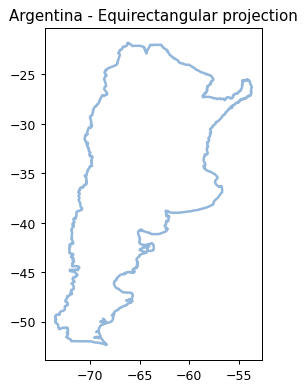

In [16]:
# 从matplotlib导入pyplot以进行绘图
from matplotlib import pyplot as plt
# 从shapely.geometry导入shape用于处理几何形状
from shapely.geometry import shape

# 从数据集中获取一个特征（即边界的几何数据）
feature = next(iter(src_borders))
# 使用shapely的shape方法将特征的几何数据转换为shapely对象
borders = shape(feature["geometry"])

# 获取边界的外部坐标（x和y坐标）
x, y = borders.geoms[0].exterior.xy

# 创建一个新图形，dpi设置为90
fig = plt.figure(1, dpi=90)
# 添加一个子图，设置为等比例显示，以防止地图失真
ax = fig.add_subplot(111, aspect='equal')
# 绘制边界的外部轮廓，设置颜色、透明度、线宽和绘图顺序
ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=2, solid_capstyle='round', zorder=2)
# 设置图形的标题
ax.set_title('Argentina - Equirectangular projection')


如果分析需要不同的坐标参考系统（CRS），可以再次使用 `transformArgentina` 对象，但要记住正确的轴顺序（*纬度， 经度*）。

In [17]:
# 使用 transformArgentina 对象将坐标从 WGS84 转换为阿根廷 Gauss-Krüger CRS
# 注意：坐标的顺序是 (纬度, 经度)，因此先传入 y（纬度），再传入 x（经度）
coords_transf = transformArgentina.transform(y, x)


Text(0.5, 1.0, 'Argentina - Gauss-Krüger (datum POSGAR 2007)')

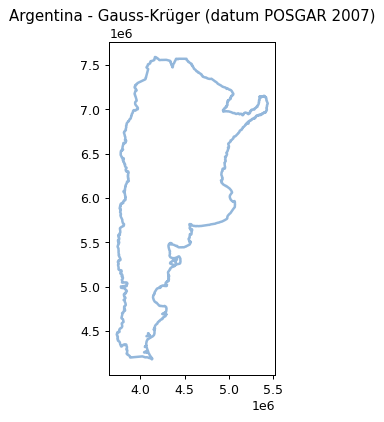

In [18]:
# 创建一个新的图形，设置 DPI 为 90
fig = plt.figure(1, dpi=90)

# 添加一个子图，并设置坐标轴比例为相等，确保地图不被扭曲
ax = fig.add_subplot(111, aspect='equal')

# 绘制转换后的坐标，注意 x 和 y 的顺序要反转
# coords_transf[1] 为经度（Easting），coords_transf[0] 为纬度（Northing）
ax.plot(coords_transf[1], coords_transf[0], color='#6699cc', alpha=0.7,
        linewidth=2, solid_capstyle='round', zorder=2)

# 设置图形标题，指明使用的是 Gauss-Krüger 投影（POSGAR 2007 数据集）
ax.set_title('Argentina - Gauss-Krüger (datum POSGAR 2007)')


两个边界形状不相似的原因可以归因于使用的不同坐标参考系统（SRS）所引入的失真：

1. **等距圆柱投影（Equirectangular Projection）**：
   - 这种投影在经线和纬线之间保持等距，但在形状、特别是在极地和地图边缘附近的形状和距离方面会造成失真。因此，虽然它可以表示整体区域，但形状和距离的准确性可能受到影响。

2. **高斯-克吕格投影（Gauss-Krüger Projection）**：
   - 高斯-克吕格投影是一种横向墨卡托投影，旨在最小化局部区域的失真。它为像阿根廷这样的区域提供了更准确的形状和距离表示，因为其中央子午线与感兴趣区域的对齐。

### 在阿根廷进行空间分析时选择SRS：

- **建议**：在阿根廷进行空间分析时，通常建议选择 **高斯-克吕格投影（POSGAR 2007）**。这是因为它具有：
  - **较低的失真**：在形状和面积上提供更准确的表示，更适合进行映射、测量和详细的空间分析。
  - **更好的准确性**：与全球投影（如等距圆柱或WGS 84）相比，在特定区域内进行距离测量和面积计算时，准确性更高。

总之，尽管等距圆柱投影可能在某些全球可视化中有用，但对于阿根廷的详细局部空间分析，高斯-克吕格投影更具优势。

## 结论

- 在使用每个数据集之前，务必检查其坐标系统，无论是在复杂分析还是简单映射中。
- 确保所需的所有数据集在合并之前都使用相同的空间参考系统（SRS）。
- 在地理坐标系统中，坐标顺序可能会有些“奇怪”：纬度优先。
- 花一些时间来确定最适合当前研究的SRS：
  - 本地基准与全球基准的选择；
  - 投影失真特性。

# 关于投影常用的库

## Pyproj
`Pyproj` 是用于处理地理坐标系转换和投影的一个Python库，它是`Proj.4`的Python接口，提供了强大的工具来进行坐标参考系统（CRS）的定义和转换。与`GeoPandas`一起使用时，`pyproj`通常在后台进行投影和坐标转换的实际计算。

### 基本概念
在`pyproj`中，投影和坐标系统转换主要是通过以下几个关键类和方法来实现的：
- **`CRS`**: 定义和处理坐标参考系统。
- **`Transformer`**: 用于坐标转换。
- **`Proj`**: 用于定义投影。

### 1. `CRS`类：定义坐标参考系统

#### 创建CRS
`CRS`类用来定义坐标参考系统。可以通过EPSG代码或PROJ字符串创建CRS对象。

```python
from pyproj import CRS

# 通过EPSG代码创建CRS (WGS84)
crs_wgs84 = CRS.from_epsg(4326)
print(crs_wgs84)

# 通过PROJ字符串创建CRS (Web墨卡托)
crs_web_mercator = CRS.from_proj4("+proj=merc +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84")
print(crs_web_mercator)
```

#### 查看CRS信息
你可以使用`CRS`对象来查看具体的坐标系信息。

```python
# 查看CRS的具体信息
print(crs_wgs84.to_string())  # 返回 EPSG:4326
print(crs_web_mercator.to_proj4())  # 返回 PROJ.4字符串
```

### 2. `Transformer`类：坐标转换

#### 创建Transformer
要在两个坐标系之间进行转换，使用`Transformer`类。你可以指定源CRS和目标CRS来进行转换。

```python
from pyproj import Transformer

# 创建一个从WGS84 (EPSG:4326) 到 Web墨卡托 (EPSG:3857) 的转换器
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

# 进行坐标转换 (经度, 纬度 转换到 x, y)
x, y = transformer.transform(120.0, 30.0)
print(x, y)
```
`always_xy=True` 参数确保输入的顺序始终是 (经度, 纬度)，输出是 (x, y)。

#### 逆向转换
你也可以使用`Transformer`类来进行逆向转换。

```python
# 进行逆向转换 (x, y 转换回 经度, 纬度)
transformer_reverse = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)
lon, lat = transformer_reverse.transform(x, y)
print(lon, lat)
```

### 3. `Proj`类：定义投影

`Proj`类主要用于定义一个具体的投影对象。虽然`Transformer`类更常用于实际的坐标转换，但`Proj`仍然可以直接用于一些简单的转换任务。

```python
from pyproj import Proj

# 定义Web墨卡托投影
proj_web_mercator = Proj("epsg:3857")

# 转换经纬度为Web墨卡托坐标
x, y = proj_web_mercator(120.0, 30.0)
print(x, y)

# 逆向转换：从Web墨卡托坐标返回到经纬度
lon, lat = proj_web_mercator(x, y, inverse=True)
print(lon, lat)
```

### 4. 批量坐标转换
如果你有多个坐标点需要转换，可以通过`Transformer`进行批量转换。

```python
# 批量转换经纬度坐标
coords = [(120.0, 30.0), (121.0, 31.0), (122.0, 32.0)]
x_y = transformer.transform([lon for lon, lat in coords], [lat for lon, lat in coords])
print(x_y)
```

### 5. 使用`pyproj`处理大地测量问题
`pyproj`还支持大地测量计算，如测量两点之间的距离、方位角等。

```python
from pyproj import Geod

# 定义一个大地测量对象，使用WGS84椭球
geod = Geod(ellps="WGS84")

# 计算两点之间的距离和方位角
lon1, lat1 = 120.0, 30.0
lon2, lat2 = 121.0, 31.0
azimuth1, azimuth2, distance = geod.inv(lon1, lat1, lon2, lat2)
print(f"方位角: {azimuth1}, 距离: {distance} 米")
```

### 6. 常用的坐标系（CRS）
`pyproj`支持使用标准的EPSG代码来定义CRS。以下是一些常用的EPSG代码：
- **EPSG:4326**: WGS 84（地理坐标系，单位为度）。
- **EPSG:3857**: Web墨卡托（常用于在线地图，单位为米）。
- **EPSG:32633**: WGS 84 UTM zone 33N（投影坐标系，单位为米）。

### 总结
`pyproj`是一个处理坐标转换的强大工具。通过`CRS`类来定义坐标参考系统，通过`Transformer`类进行坐标转换，并可以处理复杂的大地测量计算。它不仅能用于单点转换，还能支持批量转换和逆向转换，广泛应用于各种地理信息系统（GIS）项目。

In [21]:
from pyproj import Proj

# 定义Web墨卡托投影
proj_web_mercator = Proj("epsg:2363")

# 转换经纬度为Web墨卡托坐标
x, y = proj_web_mercator(117.2, 34.0)
print(x, y)

# 逆向转换：从Web墨卡托坐标返回到经纬度
lon, lat = proj_web_mercator(x, y, inverse=True)
print(lon, lat)

39518476.980102025 3763681.229682899
117.20000000000003 34.0


## Geopandas
在`GeoPandas`中，处理投影和坐标系转换是非常重要的一部分，特别是在处理地理空间数据时。`GeoPandas`提供了便捷的方法来处理地理数据的投影和坐标系转换，主要是通过以下几个关键属性和方法：

### 1. 坐标系（CRS）
每个`GeoDataFrame`都有一个坐标参考系统（CRS），它定义了地理数据的投影。这个坐标系存储在`GeoDataFrame`的`crs`属性中。

#### 查看坐标系
```python
import geopandas as gpd

# 读取一个Shapefile
gdf = gpd.read_file('data.shp')

# 查看当前的CRS
print(gdf.crs)
```
如果`GeoDataFrame`中没有定义CRS，`crs`会返回`None`，这意味着地理数据的坐标系不明确。

#### 设置坐标系
如果你的数据没有坐标系，但你知道它应该使用什么坐标系，可以用`set_crs()`来显式指定：
```python
# 设置坐标系为WGS84 (EPSG:4326)
gdf = gdf.set_crs(epsg=4326)
```

### 2. 投影和坐标系转换
要将数据从一个坐标系转换到另一个，使用`to_crs()`方法。这是进行坐标系转换的主要方法。

#### 转换坐标系
假设你有一个`GeoDataFrame`，其坐标系是WGS84（EPSG:4326），你希望将它转换为Web墨卡托投影（EPSG:3857）：
```python
# 将WGS84 (EPSG:4326)转换为Web墨卡托 (EPSG:3857)
gdf_projected = gdf.to_crs(epsg=3857)
```

你还可以使用完整的坐标系定义而不是EPSG代码：
```python
# 使用坐标系定义字符串
gdf_projected = gdf.to_crs('+proj=utm +zone=33 +datum=WGS84')
```

### 3. 坐标系定义（CRS格式）
`GeoPandas`支持两种定义坐标系的方式：
- **EPSG代码**: 例如EPSG:4326表示WGS84。
- **proj4字符串**: 例如`"+proj=utm +zone=33 +datum=WGS84"`。

#### 常见的EPSG代码
- **EPSG:4326**: WGS84（广泛使用的地理坐标系，单位为度）。
- **EPSG:3857**: Web墨卡托（用于大多数在线地图，单位为米）。
- **EPSG:32633**: WGS84 UTM zone 33N（一个常用的投影坐标系，单位为米）。

### 4. 坐标转换示例
假设你有一个数据集，其坐标系是WGS84，你希望将其转换为UTM坐标系并保存到新的文件：
```python
# 读取WGS84坐标系的Shapefile
gdf = gpd.read_file('data.shp')

# 检查当前CRS
print(gdf.crs)

# 将数据转换为UTM zone 33N (EPSG:32633)
gdf_utm = gdf.to_crs(epsg=32633)

# 保存到新的Shapefile
gdf_utm.to_file('data_utm.shp')
```

### 5. 检查和转换坐标
在实际操作中，确保你的数据都在相同的投影下是很重要的。如果你尝试对不同投影下的`GeoDataFrame`进行空间分析或绘图，可能会得到错误的结果。因此，在合并、空间分析或可视化之前，确保所有数据使用相同的坐标系。

### 6. CRS匹配
你可以使用CRS来匹配两个`GeoDataFrame`的坐标系：
```python
# 检查两个GeoDataFrame是否具有相同的CRS
if gdf1.crs == gdf2.crs:
    print("CRS匹配")
else:
    print("CRS不匹配，需要转换")
```

### 总结
在`GeoPandas`中，处理坐标系和投影转换是通过`crs`属性和`to_crs()`方法完成的。关键的步骤包括：
- **查看CRS**: 使用`crs`属性查看当前坐标系。
- **设置CRS**: 如果数据没有明确的CRS，使用`set_crs()`指定。
- **转换CRS**: 使用`to_crs()`方法将数据转换为不同的投影或坐标系。

这些工具可以帮助你轻松在不同的投影和坐标系之间切换，并确保你的地理数据在正确的坐标系中处理。

## GDAL
**GDAL (Geospatial Data Abstraction Library)** 是处理空间数据的强大库，它提供了丰富的功能来管理地理空间数据，尤其是与投影系统相关的操作。GDAL 支持各种地理数据格式，如 GeoTIFF、Shapefile、KML 等，并集成了对坐标参考系统（CRS）的支持，可以执行投影转换、坐标变换、数据重投影等操作。

以下是关于 **GDAL 投影** 相关内容的详细介绍：

### 1. **投影与坐标参考系统 (CRS)**
   投影是将地球的三维表面映射到二维平面上的一种方法，而 CRS 是描述地理或投影坐标系统的标准。GDAL 支持处理不同的投影系统并允许它们之间的转换。
   
   **GDAL 支持的 CRS 表达形式**：
   - **WKT (Well-Known Text)**：标准的文本格式，用于描述空间参考系统。
   - **EPSG 代码**：常见投影系统的标准代码（如 WGS84 是 EPSG:4326）。
   - **Proj4 字符串**：投影系统的参数化字符串形式。

### 2. **GDAL 常用投影相关操作**

#### a. **检查数据的投影信息**
   在处理空间数据时，首先需要了解其当前的 CRS。GDAL 提供了查看数据投影信息的功能。

   - 使用 `gdalinfo` 命令行工具检查栅格数据的 CRS 信息：
     ```bash
     gdalinfo your_data.tif
     ```
   - 在 Python 中，可以使用 `GetProjection()` 函数获取投影信息：
     ```python
     from osgeo import gdal

     # 打开栅格数据
     dataset = gdal.Open('your_data.tif')

     # 获取投影信息
     projection = dataset.GetProjection()
     print(projection)
     ```

#### b. **坐标变换**
   使用 `GDAL` 的 **OGR** 模块，可以进行矢量数据的坐标转换；而栅格数据的重投影可以使用 `GDAL` 模块中的重投影函数。

   **OGR 坐标变换** 示例：
   ```python
   from osgeo import osr

   # 定义源和目标坐标系
   source = osr.SpatialReference()
   source.ImportFromEPSG(4326)  # WGS84

   target = osr.SpatialReference()
   target.ImportFromEPSG(32633)  # UTM Zone 33N

   # 创建转换对象
   transform = osr.CoordinateTransformation(source, target)

   # 进行坐标转换 (经度, 纬度)
   lon, lat = 12.4924, 41.8902  # 罗马斗兽场的坐标
   x, y, z = transform.TransformPoint(lon, lat)
   print(f'UTM 坐标: 东 {x}, 北 {y}')
   ```

#### c. **重投影栅格数据**
   对栅格数据进行重投影是 GDAL 中的常见操作。GDAL 提供了 `gdalwarp` 工具来执行栅格重投影。

   **使用 `gdalwarp` 进行命令行重投影**：
   ```bash
   gdalwarp -t_srs EPSG:32633 input.tif output_utm33.tif
   ```

   **使用 Python 进行栅格重投影**：
   ```python
   from osgeo import gdal

   # 打开输入栅格数据
   src_ds = gdal.Open('input.tif')

   # 定义目标投影（UTM Zone 33N）
   dst_wkt = 'EPSG:32633'

   # 重投影
   dst_ds = gdal.Warp('output_utm33.tif', src_ds, dstSRS=dst_wkt)
   dst_ds = None  # 关闭文件
   ```

#### d. **重投影矢量数据**
   对矢量数据进行重投影通常使用 OGR 模块来完成，可以在 Python 中执行坐标系统转换和重投影操作。

   **矢量数据的重投影示例**：
   ```python
   from osgeo import ogr, osr

   # 打开矢量文件
   driver = ogr.GetDriverByName('ESRI Shapefile')
   dataset = driver.Open('input.shp', 0)  # 0 是只读模式
   layer = dataset.GetLayer()

   # 创建源和目标坐标系
   source_srs = layer.GetSpatialRef()
   target_srs = osr.SpatialReference()
   target_srs.ImportFromEPSG(32633)  # UTM 33N

   # 创建重投影对象
   transform = osr.CoordinateTransformation(source_srs, target_srs)

   # 对每个几何对象进行重投影
   for feature in layer:
       geom = feature.GetGeometryRef()
       geom.Transform(transform)  # 重投影几何对象
       print(geom.ExportToWkt())
   ```

### 3. **常见投影与转换工具**

#### a. **gdalwarp**：栅格数据的重投影工具
   `gdalwarp` 是用于将栅格数据从一种投影转换为另一种投影的工具。它支持多种输入输出格式，并可以处理不同的投影系统。
   
   - **基本命令**：
     ```bash
     gdalwarp -t_srs EPSG:4326 input.tif output_wgs84.tif
     ```
   - **关键参数**：
     - `-t_srs`：目标 CRS。
     - `-s_srs`：源 CRS（如果未指定，使用文件中的 CRS）。

#### b. **ogr2ogr**：矢量数据的重投影工具
   `ogr2ogr` 用于将矢量数据转换为不同的投影系统或格式。

   - **基本命令**：
     ```bash
     ogr2ogr -f "ESRI Shapefile" -t_srs EPSG:32633 output_utm33.shp input.shp
     ```
   - **关键参数**：
     - `-t_srs`：目标 CRS。
     - `-s_srs`：源 CRS。

### 4. **GDAL 支持的坐标系统**

   - **EPSG 数据库**：GDAL 内置了 EPSG 数据库，可以通过 EPSG 代码来快速定义 CRS。
   - **Proj.4 支持**：GDAL 与 Proj.4 库紧密集成，可以使用 Proj.4 字符串表示坐标参考系统。
   
   例如，`EPSG:4326` 的 Proj.4 字符串表示如下：
   ```bash
   +proj=longlat +datum=WGS84 +no_defs
   ```

### 5. **案例：从 WGS84 转换到 UTM**
   假设我们有一张地理坐标系（WGS84, EPSG:4326）的栅格图像，想要将其重投影到 UTM 坐标系（EPSG:32633）：

   ```bash
   gdalwarp -t_srs EPSG:32633 input_wgs84.tif output_utm33.tif
   ```

   也可以通过 Python 完成：
   ```python
   from osgeo import gdal

   # 打开源文件
   src_ds = gdal.Open('input_wgs84.tif')

   # 执行重投影
   dst_ds = gdal.Warp('output_utm33.tif', src_ds, dstSRS='EPSG:32633')

   # 关闭文件
   dst_ds = None
   ```

### 6. **GDAL 与其他库的配合**
GDAL 可以与其他库（如 `Geopandas` 和 `Shapely`）结合使用，在空间数据处理和投影转换中发挥更大的作用。例如，GDAL 可以用于读取和重投影数据，而 Geopandas 可以进一步分析和操作重投影后的数据。

### 总结
GDAL 是一个功能强大的工具库，广泛用于处理空间数据的投影和坐标转换。无论是栅格还是矢量数据，GDAL 提供了灵活的工具和函数来处理复杂的投影需求。在 Python 中，GDAL 的 Python API 提供了编程接口，可以方便地集成到自动化的空间数据处理工作流中。

---
[<- Geometry](02-geometry.ipynb) | [Vector data ->](04-vector-data.ipynb)
